## In deeplearning regularization usnig l2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons

import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
x,y=make_moons(100,noise=0.25,random_state=2)

In [5]:
y.shape

(100,)

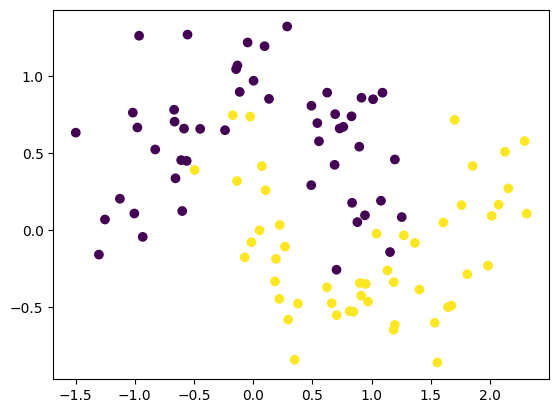

In [13]:
plt.scatter(x[:,0],x[:,1],c=y)

In [18]:
model1 = Sequential()

In [19]:
model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))



In [20]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [21]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [22]:
history1 = model1.fit(x,y,epochs=1000,validation_split=0.2,verbose=0)

In [23]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

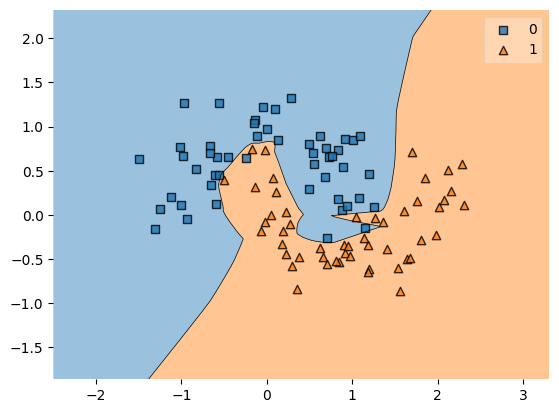

In [24]:
plot_decision_regions(x,y.astype(int),clf=model1)

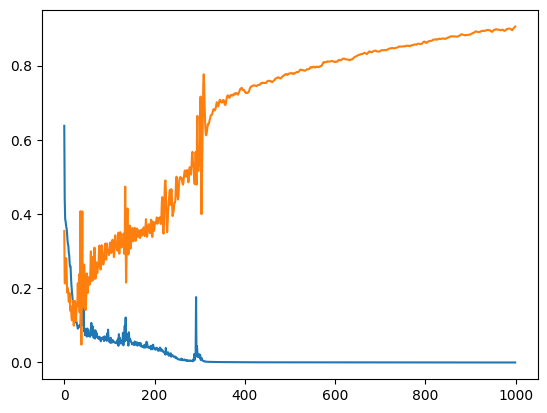

In [26]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [30]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer= tensorflow.keras.regularizers.l2(0.03) ))
model2.add(Dense(128,activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [31]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')

In [32]:
history2  = model2.fit(x,y.astype(int),epochs=1000,validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 2s 132ms/step - loss: 4.0202 - accuracy: 0.6375 - val_loss: 2.6740 - val_accuracy: 0.8500
Epoch 2/1000
3/3 [==============================] - 0s 30ms/step - loss: 2.3202 - accuracy: 0.7875 - val_loss: 1.4831 - val_accuracy: 0.9000
Epoch 3/1000
3/3 [==============================] - 0s 34ms/step - loss: 1.3254 - accuracy: 0.8250 - val_loss: 0.8289 - val_accuracy: 0.9000
Epoch 4/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.8476 - accuracy: 0.8125 - val_loss: 0.5726 - val_accuracy: 0.9000
Epoch 5/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.6581 - accuracy: 0.8250 - val_loss: 0.5212 - val_accuracy: 0.9000
Epoch 6/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.6291 - accuracy: 0.8250 - val_loss: 0.5362 - val_accuracy: 0.9000
Epoch 7/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.6273 - accuracy: 0.8375 - val_loss: 0.5788 - val_accuracy: 0.9000
Epoch 8/1000

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

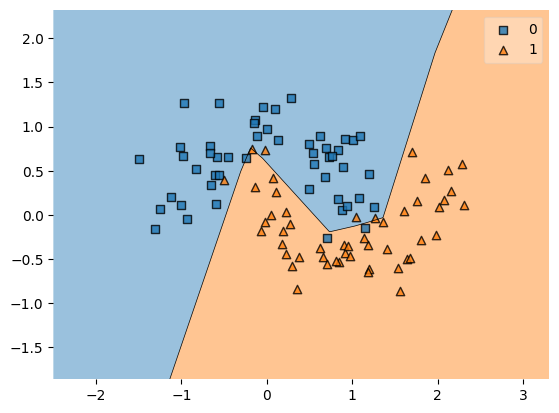

In [34]:
plot_decision_regions(x,y,clf=model2)

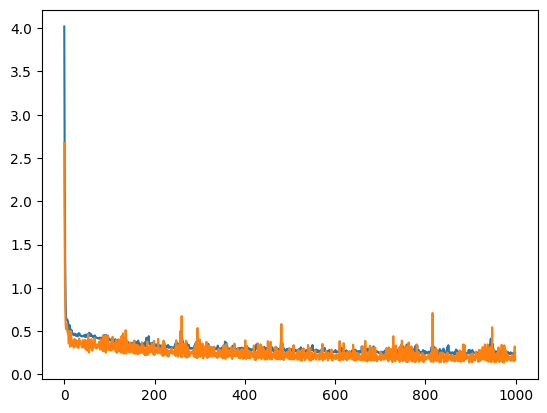

In [36]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [39]:
model1_weight = model1.get_weights()[0].reshape(256)
model2_weight = model2.get_weights()[0].reshape(256)

<Axes: >

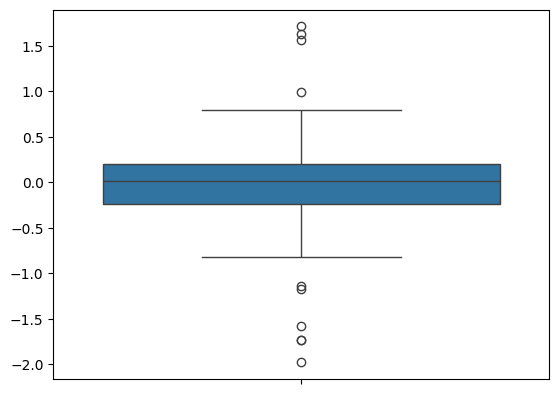

In [40]:
sns.boxplot(model1_weight)

<Axes: >

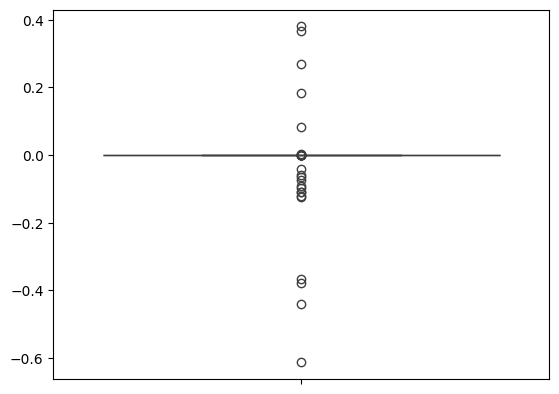

In [41]:
sns.boxplot(model2_weight)

In [44]:
model1_weight.min()

-1.9766489

In [45]:
model2_weight.min()

-0.6132563

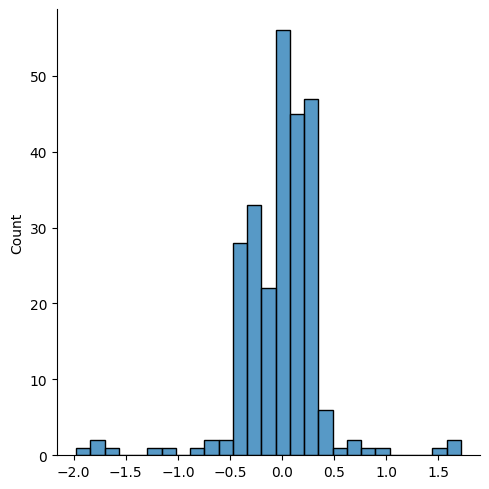

In [50]:
sns.displot(model1_weight)


ValueError: Maximum allowed size exceeded

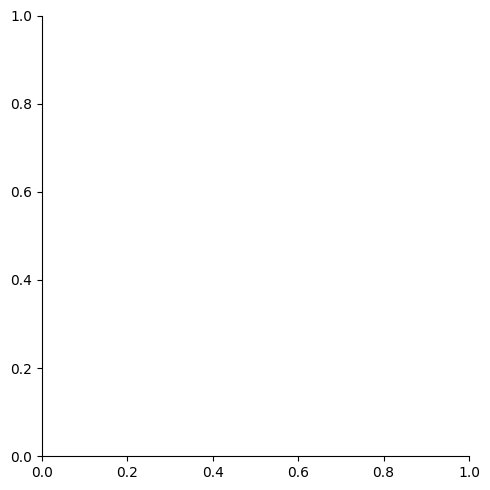

In [51]:
sns.displot(model2_weight)